In [1]:
import os, sys
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

2024-05-07 17:28:52.036043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 17:28:52.036158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 17:28:52.156931: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
body_acc_x_train= np.loadtxt('/kaggle/input/inertialsignalstest/body_acc_x_test.txt',dtype=float)
body_acc_y_train= np.loadtxt('/kaggle/input/inertialsignalstest/body_acc_y_test.txt',dtype=float)
body_acc_z_train= np.loadtxt('/kaggle/input/inertialsignalstest/body_acc_z_test.txt',dtype=float)
body_gyro_x_train= np.loadtxt('/kaggle/input/inertialsignalstest/body_gyro_x_test.txt',dtype=float)
body_gyro_y_train= np.loadtxt('/kaggle/input/inertialsignalstest/body_gyro_y_test.txt',dtype=float)
body_gyro_z_train= np.loadtxt('/kaggle/input/inertialsignalstest/body_gyro_z_test.txt',dtype=float)
total_acc_x_train= np.loadtxt('/kaggle/input/inertialsignalstest/total_acc_x_test.txt',dtype=float)
total_acc_y_train= np.loadtxt('/kaggle/input/inertialsignalstest/total_acc_y_test.txt',dtype=float)
total_acc_z_train= np.loadtxt('/kaggle/input/inertialsignalstest/total_acc_z_test.txt',dtype=float)

In [3]:
print(body_acc_x_train.shape)
print(body_acc_y_train.shape)
print(body_acc_z_train.shape)
print(body_gyro_x_train.shape)
print(body_gyro_y_train.shape)
print(body_gyro_z_train.shape)
print(total_acc_x_train.shape)
print(total_acc_y_train.shape)
print(total_acc_z_train.shape)

(2947, 128)
(2947, 128)
(2947, 128)
(2947, 128)
(2947, 128)
(2947, 128)
(2947, 128)
(2947, 128)
(2947, 128)


In [4]:
acc_mag= np.sqrt(np.square(body_acc_x_train)+np.square(body_acc_y_train)+np.square(body_acc_z_train))

In [5]:
acc_mag.shape

(2947, 128)

In [6]:
acc_mag_mean=np.mean(acc_mag,axis=1)  

In [7]:
acc_mag_mean.shape

(2947,)

In [8]:
acc_mag_mean=acc_mag_mean.reshape(2947,1)

In [9]:
acc_mag_mean.shape   #f10

(2947, 1)

In [10]:
acc_mag_std=np.std(acc_mag,axis=1)

In [11]:
acc_mag_std.shape  
acc_mag_std=acc_mag_std.reshape(2947,1)

In [12]:
acc_mag_std.shape   #f11

(2947, 1)

In [13]:
print(acc_mag_std[0])
print(acc_mag_mean[0])

[0.05594054]
[0.04957856]


In [14]:
body_acc_x_train_mean=np.mean(body_acc_x_train,axis=1)
body_acc_y_train_mean=np.mean(body_acc_y_train,axis=1)
body_acc_z_train_mean=np.mean(body_acc_z_train,axis=1)
body_gyro_x_train_mean=np.mean(body_gyro_x_train,axis=1)
body_gyro_y_train_mean=np.mean(body_gyro_y_train,axis=1)
body_gyro_z_train_mean=np.mean(body_gyro_z_train,axis=1)
total_acc_x_train_mean=np.mean(total_acc_x_train,axis=1)
total_acc_y_train_mean=np.mean(total_acc_y_train,axis=1)
total_acc_z_train_mean=np.mean(total_acc_z_train,axis=1)

In [15]:
body_acc_x_train_mean=body_acc_x_train_mean.reshape(2947,1)
body_acc_y_train_mean=body_acc_y_train_mean.reshape(2947,1)
body_acc_z_train_mean=body_acc_z_train_mean.reshape(2947,1)
body_gyro_x_train_mean=body_gyro_x_train_mean.reshape(2947,1)
body_gyro_y_train_mean=body_gyro_y_train_mean.reshape(2947,1)
body_gyro_z_train_mean=body_gyro_z_train_mean.reshape(2947,1)
total_acc_x_train_mean=total_acc_x_train_mean.reshape(2947,1)
total_acc_y_train_mean=total_acc_y_train_mean.reshape(2947,1)
total_acc_z_train_mean=total_acc_z_train_mean.reshape(2947,1)

In [16]:
print(body_acc_x_train_mean.shape)  #f1
print(body_acc_y_train_mean.shape)   #f2
print(body_acc_z_train_mean.shape)    #f3
print(body_gyro_x_train_mean.shape)     #f4
print(body_gyro_y_train_mean.shape)    #f5
print(body_gyro_z_train_mean.shape)      #f6
print(total_acc_x_train_mean.shape)       #f7
print(total_acc_y_train_mean.shape)     #f8
print(total_acc_z_train_mean.shape)     #f9

(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)


In [17]:
gx=total_acc_x_train-body_acc_x_train
thetax=np.arccos(gx/9.8)

gy=total_acc_y_train-body_acc_y_train
thetay=np.arccos(gy/9.8)

gz=total_acc_z_train-body_acc_z_train
thetaz=np.arccos(gz/9.8)

In [18]:
thetax.shape

(2947, 128)

In [19]:
thetax_mean=np.mean(thetax,axis=1)  
thetax_std=np.std(thetax,axis=1)

thetay_mean=np.mean(thetay,axis=1)  
thetay_std=np.std(thetay,axis=1)

thetaz_mean=np.mean(thetaz,axis=1)  
thetaz_std=np.std(thetaz,axis=1)

In [20]:
thetax_mean.shape
thetax_std.shape

thetay_mean.shape
thetay_std.shape

thetaz_mean.shape
thetaz_std.shape

(2947,)

In [21]:
thetax_mean=thetax_mean.reshape(2947,1)
thetax_std=thetax_std.reshape(2947,1)
thetay_mean=thetay_mean.reshape(2947,1)
thetay_std=thetay_std.reshape(2947,1)
thetaz_mean=thetaz_mean.reshape(2947,1)
thetaz_std=thetaz_std.reshape(2947,1)

In [22]:
thetax_mean.shape      #f12
thetax_std.shape       #f13

thetay_mean.shape       #f14
thetay_std.shape        #f15

thetaz_mean.shape       #f16
thetaz_std.shape        #f17

(2947, 1)

In [23]:
# Importing mean, absolute from numpy 
from numpy import mean, absolute 
#absolute mean deviation
absmeanx=absolute(body_gyro_x_train - mean(body_gyro_x_train))
absmeany=absolute(body_gyro_y_train - mean(body_gyro_y_train))
absmeanz=absolute(body_gyro_z_train - mean(body_gyro_z_train))

In [24]:
print(absmeanx)
print(absmeanx.shape)
print(absmeany)
print(absmeany.shape)
print(absmeanz)
print(absmeanz.shape)

[[0.45064879 0.48144919 0.51144249 ... 0.00812923 0.00724685 0.01681232]
 [0.18347289 0.18840719 0.14404689 ... 0.0042842  0.00806106 0.00790178]
 [0.02554141 0.0340973  0.04072115 ... 0.01771436 0.02218768 0.02218477]
 ...
 [0.85897629 0.85178429 0.82640399 ... 0.98308261 0.99781691 0.67019491]
 [0.83122141 0.63063311 0.58258551 ... 0.46172671 0.53614081 0.60884571]
 [0.31929121 0.30336921 0.57058381 ... 0.10911574 0.10389264 0.06912823]]
(2947, 128)
[[0.5298938  0.7196131  0.518873   ... 0.07879752 0.0744284  0.07210415]
 [0.06282928 0.09681895 0.1479049  ... 0.04274301 0.03777722 0.02108595]
 [0.06170508 0.0532116  0.05188297 ... 0.03860441 0.03554611 0.0318619 ]
 ...
 [0.06527155 0.2501327  0.4502594  ... 0.9438262  0.4416584  0.46318   ]
 [0.3980127  0.2676399  0.250753   ... 0.0234109  0.1074823  0.2058239 ]
 [1.0953434  1.0674604  0.5710056  ... 0.0224792  0.04334841 0.1038573 ]]
(2947, 128)
[[0.13367829 0.09477278 0.08070617 ... 0.02940826 0.02415887 0.02769648]
 [0.05224663 0.

In [25]:
absmeanx_mean=np.mean(absmeanx,axis=1)  
absmeanx_std=np.std(absmeanx,axis=1)

absmeany_mean=np.mean(absmeany,axis=1)  
absmeany_std=np.std(absmeany,axis=1)

absmeanz_mean=np.mean(absmeanz,axis=1)  
absmeanz_std=np.std(absmeanz,axis=1)

In [26]:
absmeanx_mean.shape  
absmeanx_std.shape 

absmeany_mean.shape   
absmeany_std.shape 

absmeanz_mean.shape   
absmeanz_std.shape 

(2947,)

In [27]:
absmeanx_mean=absmeanx_mean.reshape(2947,1)
absmeanx_std=absmeanx_std.reshape(2947,1)
absmeany_mean=absmeany_mean.reshape(2947,1)
absmeany_std=absmeany_std.reshape(2947,1)
absmeanz_mean=absmeanz_mean.reshape(2947,1)
absmeanz_std=absmeanz_std.reshape(2947,1)

In [28]:
absmeanx_mean.shape  #f18
absmeanx_std.shape   #f19

absmeany_mean.shape   #f20
absmeany_std.shape    #f21

absmeanz_mean.shape   #f22
absmeanz_std.shape    #f23

(2947, 1)

In [29]:
import numpy as np
from scipy import stats

In [30]:
body_acc_x_train_mad=stats.median_abs_deviation(body_acc_x_train, axis=1)
body_acc_y_train_mad=stats.median_abs_deviation(body_acc_y_train, axis=1)
body_acc_z_train_mad=stats.median_abs_deviation(body_acc_z_train, axis=1)
body_gyro_x_train_mad=stats.median_abs_deviation(body_gyro_x_train, axis=1)
body_gyro_y_train_mad=stats.median_abs_deviation(body_gyro_y_train, axis=1)
body_gyro_z_train_mad=stats.median_abs_deviation(body_gyro_z_train, axis=1)
total_acc_x_train_mad=stats.median_abs_deviation(total_acc_x_train, axis=1)
total_acc_y_train_mad=stats.median_abs_deviation(total_acc_y_train, axis=1)
total_acc_z_train_mad=stats.median_abs_deviation(total_acc_z_train, axis=1)

In [31]:
body_acc_x_train_mad.shape
body_acc_y_train_mad.shape
body_acc_z_train_mad.shape
body_gyro_x_train_mad.shape
body_gyro_y_train_mad.shape
body_gyro_z_train_mad.shape
total_acc_x_train_mad.shape
total_acc_y_train_mad.shape
total_acc_z_train_mad.shape

(2947,)

In [32]:
body_acc_x_train_mad=body_acc_x_train_mad.reshape(2947,1)
body_acc_y_train_mad=body_acc_y_train_mad.reshape(2947,1)
body_acc_z_train_mad=body_acc_z_train_mad.reshape(2947,1)
body_gyro_x_train_mad=body_gyro_x_train_mad.reshape(2947,1)
body_gyro_y_train_mad=body_gyro_y_train_mad.reshape(2947,1)
body_gyro_z_train_mad=body_gyro_z_train_mad.reshape(2947,1)
total_acc_x_train_mad=total_acc_x_train_mad.reshape(2947,1)
total_acc_y_train_mad=total_acc_y_train_mad.reshape(2947,1)
total_acc_z_train_mad=total_acc_z_train_mad.reshape(2947,1)

In [33]:
body_acc_x_train_mad.shape   #f24
body_acc_y_train_mad.shape    #f25
body_acc_z_train_mad.shape    #f26
body_gyro_x_train_mad.shape   #f27
body_gyro_y_train_mad.shape   #f28
body_gyro_z_train_mad.shape   #f29
total_acc_x_train_mad.shape   #f30
total_acc_y_train_mad.shape   #f31
total_acc_z_train_mad.shape   #f32

(2947, 1)

In [34]:
body_acc_x_train_std=np.std(body_acc_x_train,axis=1) #f33
body_acc_y_train_std=np.std(body_acc_y_train,axis=1)  #f34
body_acc_z_train_std=np.std(body_acc_z_train,axis=1)  #f35
body_gyro_x_train_std=np.std(body_gyro_x_train,axis=1)   #f36
body_gyro_y_train_std=np.std(body_gyro_y_train,axis=1)   #f37
body_gyro_z_train_std=np.std(body_gyro_z_train,axis=1)   #f38
total_acc_x_train_std=np.std(total_acc_x_train,axis=1)   #39
total_acc_y_train_std=np.std(total_acc_y_train,axis=1)   #40
total_acc_z_train_std=np.std(total_acc_z_train,axis=1)   #41

In [35]:
body_acc_x_train_std=body_acc_x_train_std.reshape(2947,1)
body_acc_y_train_std=body_acc_y_train_std.reshape(2947,1)
body_acc_z_train_std=body_acc_z_train_std.reshape(2947,1)

body_gyro_x_train_std=body_gyro_x_train_std.reshape(2947,1)
body_gyro_y_train_std=body_gyro_y_train_std.reshape(2947,1)
body_gyro_z_train_std=body_gyro_z_train_std.reshape(2947,1)

total_acc_x_train_std=total_acc_x_train_std.reshape(2947,1)
total_acc_y_train_std=total_acc_y_train_std.reshape(2947,1)
total_acc_z_train_std=total_acc_z_train_std.reshape(2947,1)

In [36]:
costhetax=np.zeros((2947,128))
costhetay=np.zeros((2947,128))
costhetaz=np.zeros((2947,128))

In [37]:
for i in range(0,2947):
    costhetax[i]=np.cos(thetax[i])
    
for i in range(0,2947):
    costhetay[i]=np.cos(thetay[i])
    
for i in range(0,2947):
    costhetaz[i]=np.cos(thetaz[i])

In [38]:
costhetax.shape

(2947, 128)

In [39]:
Vertical_acc = np.multiply(body_acc_x_train,costhetax) + np.multiply(body_acc_y_train,costhetay) + np.multiply(body_acc_z_train,costhetaz)

In [40]:
Vertical_acc.shape 

(2947, 128)

In [41]:
Horizontal_acc= np.sqrt(np.square(body_acc_x_train) + np.square(body_acc_y_train) + np.square(body_acc_z_train) - np.square(Vertical_acc))

In [42]:
Horizontal_acc.shape

(2947, 128)

In [43]:
Vertical_acc_mean=np.mean(Vertical_acc,axis=1)  
Vertical_acc_std=np.std(Vertical_acc,axis=1)

Horizontal_acc_mean=np.mean(Horizontal_acc,axis=1)  
Horizontal_acc_std=np.std(Horizontal_acc,axis=1)

In [44]:
print(Vertical_acc_mean.shape)
print(Vertical_acc_std.shape)

print(Horizontal_acc_mean.shape)
print(Horizontal_acc_std.shape)



(2947,)
(2947,)
(2947,)
(2947,)


In [45]:
Vertical_acc_mean=Vertical_acc_mean.reshape(2947,1)  
Vertical_acc_std=Vertical_acc_std.reshape(2947,1)

Horizontal_acc_mean=Horizontal_acc_mean.reshape(2947,1)  
Horizontal_acc_std=Horizontal_acc_std.reshape(2947,1)

In [46]:
print(Vertical_acc_mean.shape)  #42
print(Vertical_acc_std.shape)   #43

print(Horizontal_acc_mean.shape)  #44
print(Horizontal_acc_std.shape)   #45


(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)


In [47]:
import matplotlib.pyplot as plt
from scipy import signal

In [48]:
spectra_bx=np.zeros((2947,65))
spectra_by=np.zeros((2947,65))
spectra_bz=np.zeros((2947,65))

freq_bx=np.zeros((2947,65))
freq_by=np.zeros((2947,65))
freq_bz=np.zeros((2947,65))

In [49]:
for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_bx[i], spectra_bx[i] = signal.periodogram(body_acc_x_train[i], fs=0.50)
    
for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_by[i], spectra_by[i] = signal.periodogram(body_acc_y_train[i], fs=0.50)

for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_bz[i], spectra_bz[i] = signal.periodogram(body_acc_z_train[i], fs=0.50)


In [50]:
# peak height in the power spectrum is an estimate of the RMS amplitude.
ph_RMS_amp_bx = np.sqrt(np.amax(spectra_bx,axis=1))
ph_RMS_amp_by = np.sqrt(np.amax(spectra_by,axis=1))
ph_RMS_amp_bz = np.sqrt(np.amax(spectra_bz,axis=1))

In [51]:
ph_RMS_amp_bx.shape

(2947,)

In [52]:
spectra_gx=np.zeros((2947,65))
spectra_gy=np.zeros((2947,65))
spectra_gz=np.zeros((2947,65))

freq_gx=np.zeros((2947,65))
freq_gy=np.zeros((2947,65))
freq_gz=np.zeros((2947,65))

In [53]:
for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_gx[i], spectra_gx[i] = signal.periodogram(body_gyro_x_train[i], fs=0.50)
    
for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_gy[i], spectra_gy[i] = signal.periodogram(body_gyro_y_train[i], fs=0.50)

for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_gz[i], spectra_gz[i] = signal.periodogram(body_gyro_z_train[i], fs=0.50)


In [54]:
# peak height in the power spectrum is an estimate of the RMS amplitude.
ph_RMS_amp_gx = np.sqrt(np.amax(spectra_gx,axis=1))
ph_RMS_amp_gy = np.sqrt(np.amax(spectra_gy,axis=1))
ph_RMS_amp_gz = np.sqrt(np.amax(spectra_gz,axis=1))

In [55]:
ph_RMS_amp_gx.shape

(2947,)

In [56]:
spectra_tx=np.zeros((2947,65))
spectra_ty=np.zeros((2947,65))
spectra_tz=np.zeros((2947,65))

freq_tx=np.zeros((2947,65))
freq_ty=np.zeros((2947,65))
freq_tz=np.zeros((2947,65))

In [57]:
for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_tx[i], spectra_tx[i] = signal.periodogram(total_acc_x_train[i], fs=0.50)
    
for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_ty[i], spectra_ty[i] = signal.periodogram(total_acc_y_train[i], fs=0.50)

for i in range(0,2947):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_tz[i], spectra_tz[i] = signal.periodogram(total_acc_z_train[i], fs=0.50)


In [58]:
# peak height in the power spectrum is an estimate of the RMS amplitude.
ph_RMS_amp_tx = np.sqrt(np.amax(spectra_tx,axis=1))
ph_RMS_amp_ty = np.sqrt(np.amax(spectra_ty,axis=1))
ph_RMS_amp_tz = np.sqrt(np.amax(spectra_tz,axis=1))

In [59]:
ph_RMS_amp_tx.shape

(2947,)

In [60]:
ph_RMS_amp_bx = ph_RMS_amp_bx.reshape(2947,1)  #f46
ph_RMS_amp_by = ph_RMS_amp_by.reshape(2947,1)  #f47
ph_RMS_amp_bz = ph_RMS_amp_bz.reshape(2947,1)  #f48

ph_RMS_amp_gx = ph_RMS_amp_gx.reshape(2947,1)  #f49
ph_RMS_amp_gy = ph_RMS_amp_gy.reshape(2947,1)  #f50
ph_RMS_amp_gz = ph_RMS_amp_gz.reshape(2947,1)  #f51

ph_RMS_amp_tx = ph_RMS_amp_tx.reshape(2947,1)  #f52
ph_RMS_amp_ty = ph_RMS_amp_ty.reshape(2947,1)  #f53
ph_RMS_amp_tz = ph_RMS_amp_tz.reshape(2947,1)  #f54

In [61]:
ph_RMS_amp_tx.shape

(2947, 1)

In [62]:
q1_body_acc_x_train=np.zeros((2947,1))
q3_body_acc_x_train=np.zeros((2947,1))

q1_body_acc_y_train=np.zeros((2947,1))
q3_body_acc_y_train=np.zeros((2947,1))

q1_body_acc_z_train=np.zeros((2947,1))
q3_body_acc_z_train=np.zeros((2947,1))

q1_body_gyro_x_train=np.zeros((2947,1))
q3_body_gyro_x_train=np.zeros((2947,1))

q1_body_gyro_y_train=np.zeros((2947,1))
q3_body_gyro_y_train=np.zeros((2947,1))

q1_body_gyro_z_train=np.zeros((2947,1))
q3_body_gyro_z_train=np.zeros((2947,1))

q1_total_acc_x_train=np.zeros((2947,1))
q3_total_acc_x_train=np.zeros((2947,1))

q1_total_acc_y_train=np.zeros((2947,1))
q3_total_acc_y_train=np.zeros((2947,1))

q1_total_acc_z_train=np.zeros((2947,1))
q3_total_acc_z_train=np.zeros((2947,1))


In [63]:
for i in range(0,2947):
    q1_body_acc_x_train[i] = np.percentile(body_acc_x_train[i], 25)
    q3_body_acc_x_train[i] = np.percentile(body_acc_x_train[i], 75)

    q1_body_acc_y_train[i] = np.percentile(body_acc_y_train[i], 25)
    q3_body_acc_y_train[i] = np.percentile(body_acc_y_train[i], 75)

    q1_body_acc_z_train[i] = np.percentile(body_acc_z_train[i], 25)
    q3_body_acc_z_train[i] = np.percentile(body_acc_z_train[i], 75)

    q1_body_gyro_x_train[i] = np.percentile(body_gyro_x_train[i], 25)
    q3_body_gyro_x_train[i] = np.percentile(body_gyro_x_train[i], 75)

    q1_body_gyro_y_train[i] = np.percentile(body_gyro_y_train[i], 25)
    q3_body_gyro_y_train[i] = np.percentile(body_gyro_y_train[i], 75)

    q1_body_gyro_z_train[i] = np.percentile(body_gyro_z_train[i], 25)
    q3_body_gyro_z_train[i] = np.percentile(body_gyro_z_train[i], 75)

    q1_total_acc_x_train[i] = np.percentile(total_acc_x_train[i], 25)
    q3_total_acc_x_train[i] = np.percentile(total_acc_x_train[i], 75)

    q1_total_acc_y_train[i] = np.percentile(total_acc_y_train[i], 25)
    q3_total_acc_y_train[i] = np.percentile(total_acc_y_train[i], 75)

    q1_total_acc_z_train[i] = np.percentile(total_acc_z_train[i], 25)
    q3_total_acc_z_train[i] = np.percentile(total_acc_z_train[i], 75)

In [64]:
print(q1_body_acc_x_train.shape) #f55
print(q3_body_acc_x_train.shape) #f56
print(q1_body_acc_y_train.shape) #f57
print(q3_body_acc_y_train.shape) #f58
print(q1_body_acc_z_train.shape) #f59
print(q3_body_acc_z_train.shape) #f60
print(q1_body_gyro_x_train.shape) #f61
print(q3_body_gyro_x_train.shape) #f62
print(q1_body_gyro_y_train.shape) #f63
print(q3_body_gyro_y_train.shape) #f64
print(q1_body_gyro_z_train.shape) #f65
print(q3_body_gyro_z_train.shape) #f66
print(q1_total_acc_x_train.shape) #f67
print(q3_total_acc_x_train.shape) #f68
print(q1_total_acc_y_train.shape) #f69
print(q3_total_acc_y_train.shape) #f70
print(q1_total_acc_z_train.shape) #f71
print(q3_total_acc_z_train.shape) #f72

(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)
(2947, 1)


In [65]:
iqr_bx = q3_body_acc_x_train-q1_body_acc_x_train  #f73
iqr_by = q3_body_acc_y_train-q1_body_acc_y_train  #f74
iqr_bz = q3_body_acc_z_train-q1_body_acc_z_train  #f75

iqr_gx = q3_body_gyro_x_train-q1_body_gyro_x_train #f76
iqr_gy = q3_body_gyro_y_train-q1_body_gyro_y_train #f77
iqr_gz = q3_body_gyro_z_train-q1_body_gyro_z_train #f78

iqr_tx = q3_total_acc_x_train-q1_total_acc_x_train #f79
iqr_ty = q3_total_acc_y_train-q1_total_acc_y_train #f80
iqr_tz = q3_total_acc_z_train-q1_total_acc_z_train #f81

In [66]:
iqr_bx.shape

(2947, 1)

In [67]:
quartile_dev_bx = (iqr_bx) / 2  #f82
quartile_dev_by = (iqr_by) / 2  #f83
quartile_dev_bz = (iqr_bz) / 2  #f84

quartile_dev_gx = (iqr_gx) / 2  #f85
quartile_dev_gy = (iqr_gy) / 2  #f86
quartile_dev_gz = (iqr_gz) / 2  #f87

quartile_dev_tx = (iqr_tx) / 2  #f88
quartile_dev_ty = (iqr_ty) / 2  #f89
quartile_dev_tz = (iqr_tz) / 2  #f90

In [68]:
quartile_dev_tz.shape

(2947, 1)

In [69]:
feature_vector=np.concatenate([body_acc_x_train_mean,body_acc_y_train_mean,body_acc_z_train_mean,
                              body_gyro_x_train_mean,body_gyro_y_train_mean,body_gyro_z_train_mean,
                              total_acc_x_train_mean,total_acc_y_train_mean,total_acc_z_train_mean,
                              acc_mag_mean,acc_mag_std,
                              thetax_mean,thetax_std,thetay_mean,thetay_std,thetaz_mean,thetaz_std,
                              absmeanx_mean,absmeanx_std,absmeany_mean,absmeany_std,absmeanz_mean,absmeanz_std,
                              body_acc_x_train_mad,body_acc_y_train_mad,body_acc_z_train_mad,
                              body_gyro_x_train_mad,body_gyro_y_train_mad,body_gyro_z_train_mad,
                              total_acc_x_train_mad,total_acc_y_train_mad,total_acc_z_train_mad,
                              body_acc_x_train_std,body_acc_y_train_std,body_acc_z_train_std,
                              body_gyro_x_train_std,body_gyro_y_train_std,body_gyro_z_train_std,
                              total_acc_x_train_std,total_acc_y_train_std,total_acc_z_train_std,
                              Vertical_acc_mean,Vertical_acc_std,Horizontal_acc_mean,Horizontal_acc_std,
                              ph_RMS_amp_bx,ph_RMS_amp_by,ph_RMS_amp_bz,
                              ph_RMS_amp_gx,ph_RMS_amp_gy,ph_RMS_amp_gz,
                              ph_RMS_amp_tx,ph_RMS_amp_ty,ph_RMS_amp_tz,
                              q1_body_acc_x_train,q1_body_acc_y_train,q1_body_acc_z_train,
                              q1_body_gyro_x_train,q1_body_gyro_y_train,q1_body_gyro_z_train,
                              q1_total_acc_x_train,q1_total_acc_y_train,q1_total_acc_z_train,
                              q3_body_acc_x_train,q3_body_acc_y_train,q3_body_acc_z_train,
                              q3_body_gyro_x_train,q3_body_gyro_y_train,q3_body_gyro_z_train,
                              q3_total_acc_x_train,q3_total_acc_y_train,q3_total_acc_z_train,
                              iqr_bx,iqr_by,iqr_bz,
                              iqr_gx,iqr_gy,iqr_gz,
                              iqr_tx,iqr_ty,iqr_tz,
                              quartile_dev_bx,quartile_dev_by,quartile_dev_bz,
                              quartile_dev_gx,quartile_dev_gy,quartile_dev_gz,
                              quartile_dev_tx,quartile_dev_ty,quartile_dev_tz],axis=1)

In [70]:
feature_vector.shape

(2947, 90)

In [71]:
train_X=np.zeros((2947,90))

In [72]:
for i in range(0,2947):
    train_X[i]= (feature_vector[i] - np.amax(feature_vector[i]) + (feature_vector[i] - np.amin(feature_vector[i])))/(np.amax(feature_vector[i])-np.amin(feature_vector[i]))

In [73]:
train_X.shape

(2947, 90)

In [74]:
phitrain_X=np.arccos(train_X)

In [75]:
phitrain_X.shape

(2947, 90)

In [76]:
import math
import matplotlib.pyplot as plot

In [77]:
def cos_sum(phi_X):
    gasf=np.zeros((90,90))
    for i in range(0,90):
        for j in range(0,90):
            gasf[i][j]= math.cos(phi_X[i]+phi_X[j])
    return gasf

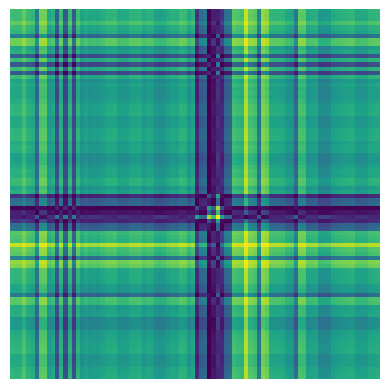

In [78]:
for i in range(2000,2947):
    gasf=cos_sum(phitrain_X[i])
    plot.imshow(gasf)
    plot.axis('off')
    plot.savefig(str(i)+".png",bbox_inches='tight', pad_inches=0)
    #plot.show()